In [15]:
import numpy as np
import grizli
import matplotlib.pyplot as plt
import seaborn as sea
import pysynphot as S

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [ ]:

## Create Grizli model object
sim_g102 = grizli.model.GrismFLT(grism_file='', verbose=False,
                                 direct_file=self.flt_input,
                                 force_grism='G102', pad=self.pad)

sim_g102.photutils_detection(detect_thresh=.025, verbose=True, save_detection=True)

keep = sim_g102.catalog['mag'] < 29
c = sim_g102.catalog

sim_g102.compute_full_model(ids=c['id'][keep], mags=c['mag'][keep], verbose=False)

## Grab object near the center of the image
dr = np.sqrt((sim_g102.catalog['x_flt'] - 579) ** 2 + (sim_g102.catalog['y_flt'] - 522) ** 2)
ix = np.argmin(dr)
id = sim_g102.catalog['id'][ix]

## Spectrum cutouts
self.beam = grizli.model.BeamCutout(sim_g102, beam=sim_g102.object_dispersers[id]['A'], conf=sim_g102.conf)

def Sim_spec(self, metal, age, tau, gen_2d = False):
import pysynphot as S
if self.delayed == True:
    model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_dt%s_spec.npy' % (metal, age, tau)
else:
    model = '../../../fsps_models_for_fit/fsps_spec/m%s_a%s_t%s_spec.npy' % (metal, age, tau)

wave, fl = np.load(model)
spec = S.ArraySpectrum(wave, fl, fluxunits='flam')
spec = spec.redshift(self.redshift).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
spec.convert('flam')
## Compute the models
self.model_spec = self.beam.beam.compute_model(spectrum_1d=[spec.wave, spec.flux])
if gen_2d == True:
    self.model_2d = self.model_spec.reshape(self.beam.beam.sh_beam)
#model_spec = co.beam.compute_model(spectrum_1d=[wv, fl], in_place=False)
#model = model_spec.reshape(co.beam.sh_beam)[10:-10]

In [3]:
## Create Grizli model object
sim_g102 = grizli.model.GrismFLT(grism_file='', verbose=False,
                                 direct_file='../data/galaxy_flts/%s_flt.fits' % 's39170',
                                 force_grism='G102', pad=100)

sim_g102.photutils_detection(detect_thresh=.025, verbose=True, save_detection=True)

keep = sim_g102.catalog['mag'] < 29
c = sim_g102.catalog

No TEAL-based tasks available for this package!
../data/galaxy_flts/s39170_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39170_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39170_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39170_flt: save ../data/galaxy_flts/s39170_flt.detect_seg.fits, ../data/galaxy_flts/s39170_flt.detect.cat


In [4]:
sim_g102.compute_full_model(ids=c['id'][keep], mags=c['mag'][keep], verbose=False)

## Grab object near the center of the image
dr = np.sqrt((sim_g102.catalog['x_flt'] - 579) ** 2 + (sim_g102.catalog['y_flt'] - 522) ** 2)
ix = np.argmin(dr)
id = sim_g102.catalog['id'][ix]

## Spectrum cutouts
beam = grizli.model.BeamCutout(sim_g102, beam=sim_g102.object_dispersers[id]['A'], conf=sim_g102.conf)

In [6]:
model = '../../../fsps_models_for_fit/fsps_spec/m0.019_a3.0_dt8.0_spec.npy'

wave, fl = np.load(model)
spec = S.ArraySpectrum(wave, fl, fluxunits='flam')
spec = spec.redshift(1.023).renorm(1., 'flam', S.ObsBandpass('wfc3,ir,f105w'))
spec.convert('flam')


In [9]:
beam.beam.compute_model(spectrum_1d=[spec.wave, spec.flux],in_place=False)


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [12]:
## Compute the models
model_spec = beam.beam.compute_model(spectrum_1d=[spec.wave, spec.flux],in_place=False)
model_2d = model_spec.reshape(beam.beam.sh_beam)

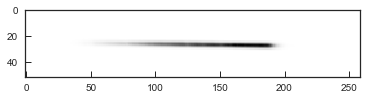

In [16]:
%matplotlib inline
plt.imshow(model_2d)

In [17]:
beam.beam.sh_beam

(52, 259)

In [20]:
w, f, e = beam.beam.optimal_extract(beam.model, bin=0)


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:496: RuntimeWarning: invalid value encountered in divide
  self.optimal_profile = m/m.sum(axis=0)


In [21]:
w.size

259